In [613]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
#import sqlite3

In [614]:
r = requests.get('https://www.nytimes.com/elections/results/virginia-general-elections')

In [615]:
r_beaut = BeautifulSoup(r.content, "lxml")
r_beaut.prettify()
#find all tables in the result
found_table = r_beaut.findAll("table")
#turn to dataframe
pd_html_read = pd.read_html(str(found_table),flavor="html5lib")
#how many table?
print("# of tables: ", len(pd_html_read))

# of tables:  7


In [616]:
state_leg = pd_html_read[6]

In [617]:
state_leg

,District Dist.,Leader,Unnamed: 2,Rpt.
0,1,76%Terry Kilgore* Rep.,24%Alicia Kallen Dem.,100%
1,2,63%Jennifer Foy Dem.,37%Mike Makee Rep.,100%
2,3,78%Will Morefield* Rep.,22%Bill Bunch Dem.,100%
3,4,0%Todd Pillion* Rep.,Uncontested,NaN
4,5,0%Israel O'Quinn* Rep.,Uncontested,NaN
5,6,82%Jeffrey Campbell* Rep.,18%Kenneth Browning Ind.,100%
6,7,66%Nick Rush* Rep.,34%Flourette Ketner Dem.,100%
7,8,64%Gregory Habeeb* Rep.,36%Steve McBride Dem.,100%
8,9,70%Charles Poindexter* Rep.,30%Stephanie Cook Dem.,100%
9,10,52%Wendy Gooditis Dem.,48%Randall Minchew* Rep.,100%


In [618]:
state_leg.columns = ['District Dist.', 'Leader', 'Contestant', 'Rpt.']
#state_leg.drop("District Dist.", axis=1, inplace=True)
#state_leg

In [619]:
reg = '(\d+)%(.*)\s*\**([RDILG]\S+)'
#reg_alt = '(\d+)%(.*)\s*(\S+)'
reg_2 = '\*'
per = []
name = []
aff = []
inc = []
for i in range(0, len(state_leg)):
    ma = re.findall(reg, state_leg.at[i, "Leader"])
    #print(ma)
    if ma:
        #print(ma)
        p, n, a = ma[0]
        p = int(p)
        #if p == 0:
         #   p = 100
        per.append(p)
        name.append(n)
        aff.append(a)
        #name.append(ma[1])
    else:
        print(state_leg.at[i, "Leader"])
    ma_2 = re.findall(reg_2, state_leg.at[i, "Leader"])
    if ma_2:
        inc.append("True")
    else:
        inc.append("False")

In [620]:
state_leg["leader_percentage"] = per
state_leg["leader_name"] = name
state_leg["leader_affiliation"] = aff
state_leg["leader_incumbent?"] = inc
state_leg.drop("Leader", axis=1, inplace=True)
state_leg

,District Dist.,Contestant,Rpt.,leader_percentage,leader_name,leader_affiliation,leader_incumbent?
0,1,24%Alicia Kallen Dem.,100%,76,Terry Kilgore*,Rep.,True
1,2,37%Mike Makee Rep.,100%,63,Jennifer Foy,Dem.,False
2,3,22%Bill Bunch Dem.,100%,78,Will Morefield*,Rep.,True
3,4,Uncontested,NaN,0,Todd Pillion*,Rep.,True
4,5,Uncontested,NaN,0,Israel O'Quinn*,Rep.,True
5,6,18%Kenneth Browning Ind.,100%,82,Jeffrey Campbell*,Rep.,True
6,7,34%Flourette Ketner Dem.,100%,66,Nick Rush*,Rep.,True
7,8,36%Steve McBride Dem.,100%,64,Gregory Habeeb*,Rep.,True
8,9,30%Stephanie Cook Dem.,100%,70,Charles Poindexter*,Rep.,True
9,10,48%Randall Minchew* Rep.,100%,52,Wendy Gooditis,Dem.,False


In [621]:
cont = []
reg = 'Uncontested'
reg_2 = '(\d+)%(.*)\s*\**([RDILG]\S+)'
reg_3 = '\*'
per = []
name = []
aff = []
inc = []

for i in range(0, len(state_leg)):
    ma = re.findall(reg, state_leg.at[i, "Contestant"])
    if ma:
        cont.append("No")
        per.append("N/A")
        name.append("N/A")
        aff.append("N/A")
        inc.append("N/A")
        
    else:
        cont.append("Yes")
        ma_2 = re.findall(reg_2, state_leg.at[i, "Contestant"])
        #print(state_leg.at[i, "Contestant"])
        p, n, a = ma_2[0]
        per.append(int(p))
        name.append(n)
        aff.append(a)
        
        ma_3 = re.findall(reg_3, state_leg.at[i, "Contestant"])
        if ma_3:
            inc.append("Yes")
        else:
            inc.append("No")

In [622]:
state_leg["contested?"] = cont
state_leg["contestant_percentage"] = per
state_leg["contestant_name"] = name
state_leg["contestant_affiliation"] = aff
state_leg["contestant_incumbent?"] = inc
state_leg.drop("Contestant", axis=1, inplace=True)
state_leg.drop("Rpt.", axis=1, inplace=True)
#pd.set_option('display.height', 600)
#pd.set_option('display.max_rows', 600)
state_leg

,District Dist.,leader_percentage,leader_name,leader_affiliation,leader_incumbent?,contested?,contestant_percentage,contestant_name,contestant_affiliation,contestant_incumbent?
0,1,76,Terry Kilgore*,Rep.,True,Yes,24,Alicia Kallen,Dem.,No
1,2,63,Jennifer Foy,Dem.,False,Yes,37,Mike Makee,Rep.,No
2,3,78,Will Morefield*,Rep.,True,Yes,22,Bill Bunch,Dem.,No
3,4,0,Todd Pillion*,Rep.,True,No,N/A,N/A,N/A,N/A
4,5,0,Israel O'Quinn*,Rep.,True,No,N/A,N/A,N/A,N/A
5,6,82,Jeffrey Campbell*,Rep.,True,Yes,18,Kenneth Browning,Ind.,No
6,7,66,Nick Rush*,Rep.,True,Yes,34,Flourette Ketner,Dem.,No
7,8,64,Gregory Habeeb*,Rep.,True,Yes,36,Steve McBride,Dem.,No
8,9,70,Charles Poindexter*,Rep.,True,Yes,30,Stephanie Cook,Dem.,No
9,10,52,Wendy Gooditis,Dem.,False,Yes,48,Randall Minchew*,Rep.,Yes


In [623]:
dem_over = 0
dems = 0
color = []
row = []
for i in range (0, len(state_leg)):
    aff = state_leg.at[i, "leader_affiliation"]
    inc = state_leg.at[i, "leader_incumbent?"]
    con = state_leg.at[i, "contested?"]
    if aff == "Dem." and inc == "False":
        dem_over += 1
        dems += 1
        color.append("lightblue")
        row.append(i + 1)
            
    elif aff == "Dem.":
        dems += 1
        color.append("blue")
    elif aff == "Rep.":
        color.append("red")
    
   # else:
    #    print(aff)
print("Number of total democrates:", dems, "\nNumber of Dem overthrow:", dem_over)
state_leg["col"] = color
state_leg

Number of total democrates: 50 
Number of Dem overthrow: 17


,District Dist.,leader_percentage,leader_name,leader_affiliation,leader_incumbent?,contested?,contestant_percentage,contestant_name,contestant_affiliation,contestant_incumbent?,col
0,1,76,Terry Kilgore*,Rep.,True,Yes,24,Alicia Kallen,Dem.,No,red
1,2,63,Jennifer Foy,Dem.,False,Yes,37,Mike Makee,Rep.,No,lightblue
2,3,78,Will Morefield*,Rep.,True,Yes,22,Bill Bunch,Dem.,No,red
3,4,0,Todd Pillion*,Rep.,True,No,N/A,N/A,N/A,N/A,red
4,5,0,Israel O'Quinn*,Rep.,True,No,N/A,N/A,N/A,N/A,red
5,6,82,Jeffrey Campbell*,Rep.,True,Yes,18,Kenneth Browning,Ind.,No,red
6,7,66,Nick Rush*,Rep.,True,Yes,34,Flourette Ketner,Dem.,No,red
7,8,64,Gregory Habeeb*,Rep.,True,Yes,36,Steve McBride,Dem.,No,red
8,9,70,Charles Poindexter*,Rep.,True,Yes,30,Stephanie Cook,Dem.,No,red
9,10,52,Wendy Gooditis,Dem.,False,Yes,48,Randall Minchew*,Rep.,Yes,lightblue


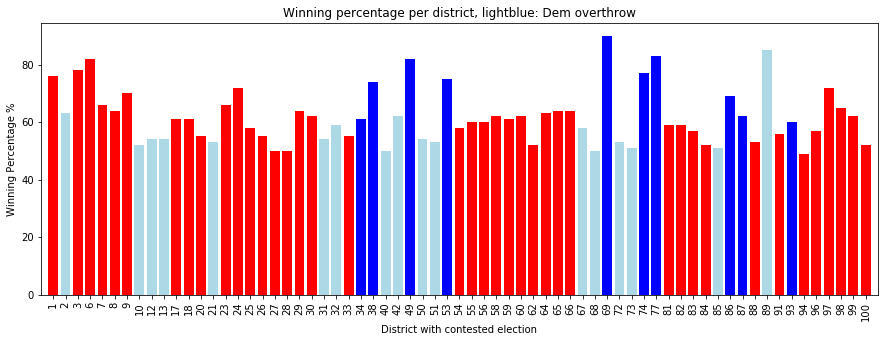

In [624]:
y = [x for x in state_leg["leader_percentage"] if x != 0]
rows = state_leg.index[state_leg['leader_percentage'] != 0].tolist()
x_n = [str(state_leg.at[k, "District Dist."]) for k in rows]
col = [state_leg.at[k, "col"] for k in rows]
x = np.arange(1, len(y)+1)
fig, axes = plt.subplots(figsize=(15,5))
#shows the percentage of the uncontested as 0%
plt.bar(x, y, color=col)
plt.title("Winning percentage per district, lightblue: Dem overthrow")
#plt.gca().set_xticklabels(x_n)
plt.xticks(np.arange(1, len(y)+1, 1.0))
plt.gca().set_xticklabels(x_n, rotation=90)
plt.xlabel("District with contested election")
plt.ylabel("Winning Percentage %")
plt.xlim(0,len(y)+1)
plt.show()


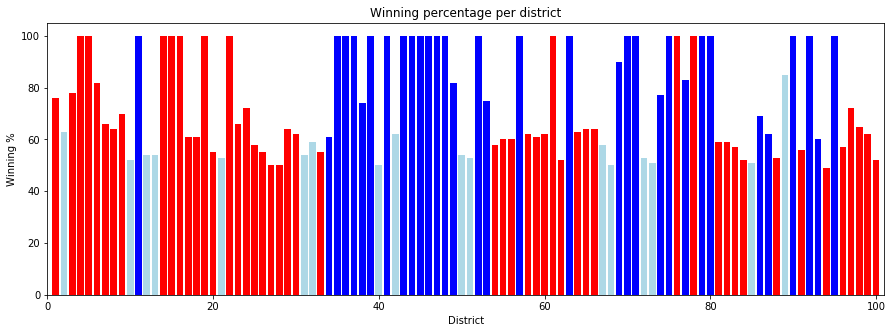

In [625]:
#all  uncontested - changes to 100% instead of 0%
y = [k if k > 0 else 100 for k in state_leg["leader_percentage"]]
x = np.arange(1, len(y)+1)
fig, axes = plt.subplots(figsize=(15,5))
plt.bar(x,y,color=state_leg["col"])
plt.xlim(0,len(y)+1)
plt.xlabel("District")
plt.ylabel("Winning %")
plt.title("Winning percentage per district")
plt.show()